# AI vs Human art classification
This project is done as part of the Context Aware Security Analytics In Computer Vision 2023/2024 course

Supervised by **Carmen Bisogni**

By **Zakarya Boudraf**, **Mohammed Aziz Khitmi** and **Melissa Ould Braham**

In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### listing the training then the testing directories 

In [68]:
top_dir = '/kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset'

# Define the training paths
train_dir = os.path.join(top_dir, 'train')

# List all directories in the train directory
all_directories = os.listdir(train_dir)

# Initialize lists to store directories for human-drawn and AI-generated images
train_human = []
train_ai = []

# Loop through all directories
for directory in all_directories:
    # Check if the directory represents human-drawn images
    if not directory.startswith('AI_'):
        train_human.append(os.path.join(train_dir, directory))
    # Check if the directory represents AI-generated images
    else:
        train_ai.append(os.path.join(train_dir, directory))

# Print the lists of directories
print("Train directories containing human-drawn images:")
for i, directory in enumerate(train_human):
    print(f"{i}. {directory}")

print("\nTrain directories containing AI-generated images:")
for i, directory in enumerate(train_ai):
    print(f"{i}. {directory}")

Train directories containing human-drawn images:
0. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/impressionism
1. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/renaissance
2. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/surrealism
3. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/art_nouveau
4. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/baroque
5. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/expressionism
6. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/romanticism
7. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/ukiyo_e
8. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/post_impressionism
9. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/realism

Train directories containing AI-generated images:
0. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/AI_SD_impressionism
1. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train/AI_LD_post_impressionism
2. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/tr

In [69]:
# Define the test paths
test_dir = os.path.join(top_dir, 'test')

# List all directories in the test directory
all_directories = os.listdir(test_dir)

# Initialize lists to store directories for human-drawn and AI-generated images
test_human = []
test_ai = []

# Loop through all directories
for directory in all_directories:
    # Check if the directory represents human-drawn images
    if not directory.startswith('AI_'):
        test_human.append(os.path.join(test_dir, directory))
    # Check if the directory represents AI-generated images
    else:
        test_ai.append(os.path.join(test_dir, directory))

# Print the lists of directories
print("Test directories containing human-drawn images:")
for i, directory in enumerate(test_human):
    print(f"{i}. {directory}")

print("\nTest directories containing AI-generated images:")
for i, directory in enumerate(test_ai):
    print(f"{i}. {directory}")

Test directories containing human-drawn images:
0. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/impressionism
1. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/renaissance
2. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/surrealism
3. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/art_nouveau
4. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/baroque
5. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/expressionism
6. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/romanticism
7. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/ukiyo_e
8. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/post_impressionism
9. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/realism

Test directories containing AI-generated images:
0. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/AI_SD_impressionism
1. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/AI_LD_post_impressionism
2. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/AI_LD_art_n

# Ranking the styles from easiest to hardest to classify 
1. Realism
1. Renaissance
1. Ukiyo-e
1. Baroque
1. Post-Impressionism
1. Impressionism
1. Romanticism
1. Expressionism
1. Surrealism
1. Art Nouveau

# Model for Classifying AI-Generated images on all styles
## First we list the training data

In [70]:
style_filter = "realism"

In [71]:
# Print the lists of directories
print("Test directories containing human-drawn images:")
for i, directory in enumerate(test_human):
    style_filter_human = "/" + style_filter
    if style_filter_human in directory: 
        print(f"{i}. {directory}")

print("\nTest directories containing AI-generated images:")
for i, directory in enumerate(test_ai):
    style_filter_ai = "_" + style_filter
    if style_filter_ai in directory: 
        print(f"{i}. {directory}")

Test directories containing human-drawn images:
9. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/realism

Test directories containing AI-generated images:
13. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/AI_SD_realism
16. /kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/test/AI_LD_realism


# Labeling the training data

In [72]:
# Initialize lists to store file paths and labels
filepaths = []
labels = []

# Initialize an empty DataFrame for train_data
train_data = pd.DataFrame(columns=['filepath', 'label'])

# Label files under train_human as "human"
for directory in train_human:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        if style_filter_human in filepath:
            filepaths.append(filepath)
            labels.append("human")

# Label files under train_ai as "AI"
for directory in train_ai:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        if style_filter_ai in filepath:
            filepaths.append(filepath)
            labels.append("AI")

# Create a DataFrame with file paths and labels
data = pd.DataFrame({'filepath': filepaths, 'label': labels})

# Concatenate data with train_data
train_data = pd.concat([train_data, data], ignore_index=True)

In [73]:
train_data

,filepath,label
0,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
1,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
2,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
3,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
4,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
...,...,...
15475,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
15476,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
15477,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
15478,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI


### We split the training data into training and validation subsets (80/20)

In [74]:
from sklearn.model_selection import train_test_split

train_data, validation_data = train_test_split(train_data, test_size=0.2)

In [75]:
train_data

,filepath,label
405,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
9428,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
11853,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
12129,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
10396,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
...,...,...
6709,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
8013,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
2303,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
2534,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human


In [76]:
validation_data

,filepath,label
4613,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
11698,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
2011,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
4363,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
11824,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
...,...,...
6897,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
241,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
9959,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
1437,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human


In [77]:
# Count the number of files under each label
file_counts = train_data['label'].value_counts()

# Print the counts
print("Number of files under each label:")
print(file_counts)

Number of files under each label:
label
AI       8337
human    4047
Name: count, dtype: int64


In [78]:
# Initialize lists to store file paths and labels
filepaths = []
labels = []

# Initialize an empty DataFrame for test_data
test_data = pd.DataFrame(columns=['filepath', 'label'])

# Label files under test_human as "human"
for directory in test_human:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        if style_filter_human in filepath:
            filepaths.append(filepath)
            labels.append("human")

# Label files under test_ai as "AI"
for directory in test_ai:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        if style_filter_ai in filepath:
            filepaths.append(filepath)
            labels.append("AI")

# Create a DataFrame with file paths and labels
data = pd.DataFrame({'filepath': filepaths, 'label': labels})

# Concatenate data with test_data
test_data = pd.concat([test_data, data], ignore_index=True)

In [79]:
test_data

,filepath,label
0,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
1,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
2,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
3,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
4,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,human
...,...,...
2995,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
2996,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
2997,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI
2998,/kaggle/input/real-ai-art/Real_AI_SD_LD_Datase...,AI


In [80]:
# Count the number of files under each label
file_counts = test_data['label'].value_counts()

# Print the counts
print("Number of files under each label:")
print(file_counts)

Number of files under each label:
label
AI       2000
human    1000
Name: count, dtype: int64


### Creating the Training and Validation sets

In [81]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import image_dataset_from_directory

training_generator = ImageDataGenerator(rescale=1./255,   # to normalize pixel value
                                       # rotation_range=7, # it will apply rotations to the image
                                       # horizontal_flip=True, # it will flip image horizontally
                                       # zoom_range=0.2  # it will increase and decrease zoom by 0.2x
                                       )
train_dataset = training_generator.flow_from_dataframe(
    dataframe=train_data,
    x_col='filepath',  # Column containing file paths
    y_col='label',     # Column containing labels
    target_size=(32, 32),
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

2024-06-06 14:29:43.974412: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-06 14:29:43.974581: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-06 14:29:44.164628: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 12384 validated image filenames belonging to 2 classes.


In [82]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import image_dataset_from_directory

validation_generator = ImageDataGenerator(rescale=1./255,   # to normalize pixel value
                                       # rotation_range=7, # it will apply rotations to the image
                                       # horizontal_flip=True, # it will flip image horizontally
                                       # zoom_range=0.2  # it will increase and decrease zoom by 0.2x
                                       )
validation_dataset = validation_generator.flow_from_dataframe(
    dataframe=validation_data,
    x_col='filepath',  # Column containing file paths
    y_col='label',     # Column containing labels
    target_size=(32, 32),
    batch_size=64,
    class_mode='categorical',  
    shuffle=True
)

Found 3096 validated image filenames belonging to 2 classes.


In [83]:
train_dataset.class_indices

{'AI': 0, 'human': 1}

### Creating the Test set

In [84]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_dataframe(  dataframe=test_data,
                                                    x_col='filepath',  # Column containing file paths
                                                    y_col='label',     # Column containing labels
                                                    target_size = (32, 32),
                                                    batch_size = 1,    # 1 image at a time to evaluate the NN
                                                    class_mode = 'categorical',
                                                    shuffle = False)   # to associate the prediction with expected output

test_dataset.class_indices

Found 3000 validated image filenames belonging to 2 classes.


{'AI': 0, 'human': 1}

### Building the neural network

In [85]:
from keras.models import Sequential
from keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from keras.metrics import Precision, Recall

from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = 3, input_shape = (32,32,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters = 64, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
# MLP
# adding the first hidden layer 
model.add(Dense(units = 32, activation = 'relu', input_dim = 64))

# adding the second hidden layer 
model.add(Dense(units = 16, activation = 'relu'))

# adding the output layer 
model.add(Dense(units = 2, activation = 'softmax')) 

model.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )  

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,042 (441.57 KB)

 Trainable params: 113,042 (441.57 KB)

 Non-trainable params: 0 (0.00 B)

### We fit the model to the data (we implement checkpointing to save the weights of the maximum val_acc model)

In [86]:
os.makedirs('../working/models')

In [87]:
from keras.callbacks import ModelCheckpoint

checkpoint_filepath = '../working/models/checkpoint.model.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Model is saved at the end of every epoch, if it's the best seen so far.

In [88]:
import time

# Initial epoch count
epochs = 30

# Initialize total training time
total_training_time = 0


# Record start time
start_time = time.time()

# Fit the model for the specified number of epochs
history = model.fit(train_dataset, epochs=epochs, validation_data=validation_dataset, callbacks=[model_checkpoint_callback])

# Calculate training time for the current batch of epochs
training_time = time.time() - start_time

# Print total training time
print("Total training time so far: {:.2f} seconds".format(training_time))


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


194/194 ━━━━━━━━━━━━━━━━━━━━ 107s 524ms/step - accuracy: 0.7021 - loss: 0.5909 - val_accuracy: 0.8718 - val_loss: 0.3314
Epoch 2/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 57s 284ms/step - accuracy: 0.8635 - loss: 0.3413 - val_accuracy: 0.8931 - val_loss: 0.2695
Epoch 3/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 60s 301ms/step - accuracy: 0.8902 - loss: 0.2791 - val_accuracy: 0.9121 - val_loss: 0.2332
Epoch 4/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 58s 293ms/step - accuracy: 0.9059 - loss: 0.2364 - val_accuracy: 0.9283 - val_loss: 0.2010
Epoch 5/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 58s 291ms/step - accuracy: 0.9142 - loss: 0.2101 - val_accuracy: 0.9173 - val_loss: 0.2107
Epoch 6/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 58s 290ms/step - accuracy: 0.9214 - loss: 0.2015 - val_accuracy: 0.9338 - val_loss: 0.1816
Epoch 7/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 55s 276ms/step - accuracy: 0.9336 - loss: 0.1739 - val_accuracy: 0.9390 - val_loss: 0.1684
Epoch 8/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 55s 274ms/step - accuracy: 0.9424 - loss: 0.1519 - va

### Evaluating the network

In [89]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

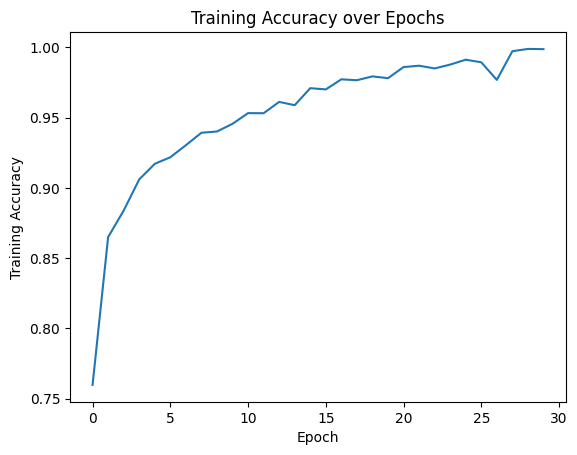

In [90]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy']);
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.show()

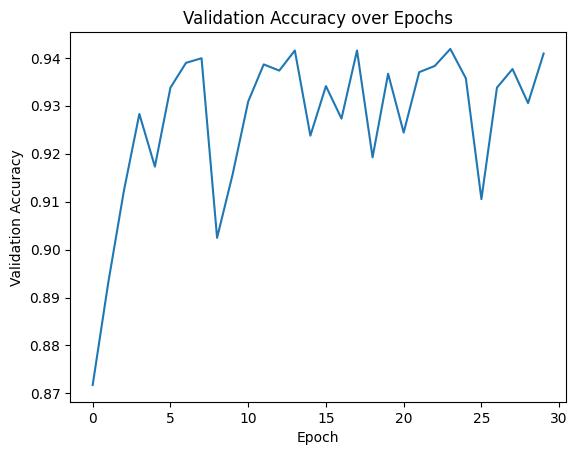

In [91]:
from matplotlib import pyplot as plt

plt.plot(history.history['val_accuracy']);
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.show()

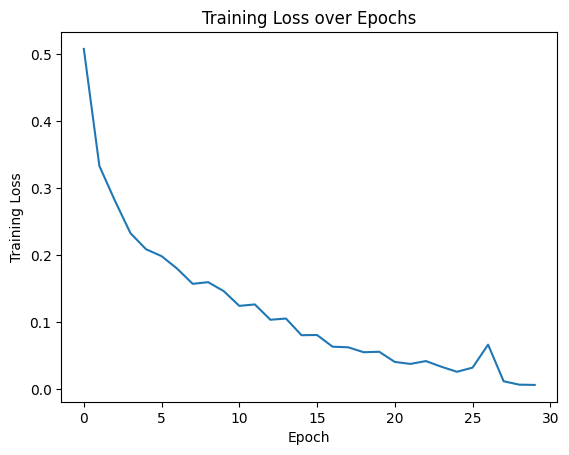

In [92]:
plt.plot(history.history['loss']);
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.show()

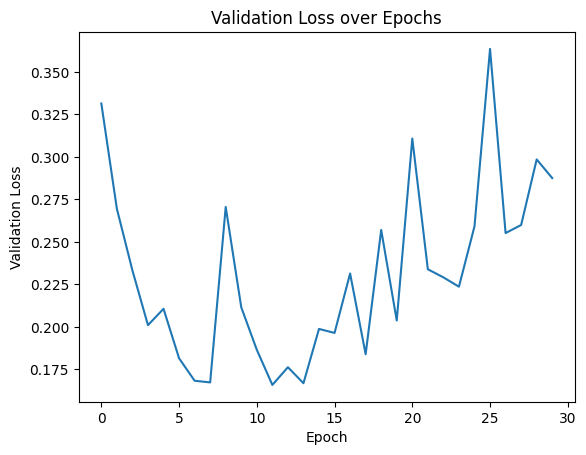

In [93]:
plt.plot(history.history['val_loss']);
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs')
plt.show()

## Reviewing the results
We notice from the graphs of our first approach that our models need more epochs to stablize.

In [94]:
# The model weights (that are considered the best) can be loaded as -
model.load_weights(checkpoint_filepath)

In [95]:
predictions = model.predict(test_dataset)
predictions

3000/3000 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step


array([[5.6777168e-02, 9.4322282e-01],
       [9.6916384e-01, 3.0836215e-02],
       [3.7877805e-06, 9.9999619e-01],
       ...,
       [9.9996006e-01, 3.9941013e-05],
       [9.9999988e-01, 1.1928985e-07],
       [1.0000000e+00, 1.6555349e-14]], dtype=float32)

In [96]:
test_dataset.class_indices

{'AI': 0, 'human': 1}

In [97]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([1, 0, 1, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2000
           1       0.92      0.88      0.90      1000

    accuracy                           0.93      3000
   macro avg       0.93      0.92      0.93      3000
weighted avg       0.93      0.93      0.93      3000



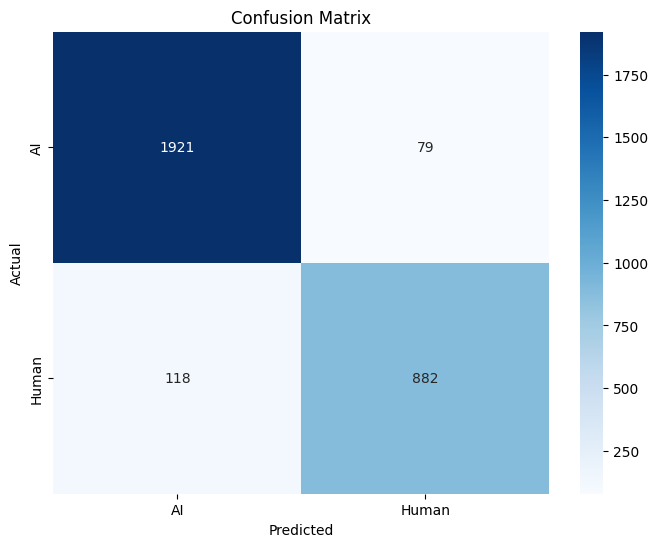

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix and classification report
cm = confusion_matrix(test_dataset.classes, predictions)
report = classification_report(test_dataset.classes, predictions)

# Define custom labels for the axes
labels = ['AI', 'Human']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

# Add labels to the axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Print classification report
print(report)

# Show the plot
plt.show()